Instalamos algunas librerias

In [ ]:
!pip install Pillow
!pip install tensorflow

In [ ]:
!pip install cellpose

In [ ]:
!pip install --upgrade cellpose

In [14]:
import os
import random
import shutil

# Especifica la ruta a las imágenes (CAMBIAR ANTES DE ENTREGAR)
data_path = ".\\foreground_cadagusano"

# Especifica la ruta donde se guardarán las imágenes de entrenamiento y de pruebas
train_path = ".\\train"
test_path = ".\\test"

# Crea las carpetas de entrenamiento y de pruebas
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Especifica el porcentaje de imágenes que se usarán para entrenamiento (por defecto 80%)
train_ratio = 0.8

# Obtiene la lista de todas las imágenes en el directorio
images = [f for f in os.listdir(data_path) if f.endswith('.png')]

# Mezcla aleatoriamente la lista de imágenes
random.shuffle(images)

# Calcula la cantidad de imágenes que se usarán para entrenamiento y para pruebas
num_train = int(len(images) * train_ratio)
num_test = len(images) - num_train

# Copia las imágenes de entrenamiento al directorio de entrenamiento
for i in range(num_train):
    src = os.path.join(data_path, images[i])
    dst = os.path.join(train_path, images[i])
    shutil.copyfile(src, dst)

# Copia las imágenes de pruebas al directorio de pruebas
for i in range(num_train, num_train + num_test):
    src = os.path.join(data_path, images[i])
    dst = os.path.join(test_path, images[i])
    shutil.copyfile(src, dst)

In [15]:
from PIL import Image
import numpy as np
import os

# Especifica la ruta a las imágenes (CAMBIAR ANTES DE ENTREGAR)
data_path = ".\\BBBC010_v2_images"

images = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith('.tif')]
images = [i for i in images if "w1" in i]
# Lee cada imagen y conviértela a un arreglo de numpy
X = []
for image in images:
    with Image.open(image) as img:
        img = img.resize((256, 256)) # Cambia el tamaño de la imagen si es necesario
        img_arr = np.array(img)
        X.append(img_arr)

# Convierte la lista de arreglos de numpy en un arreglo de numpy de 4 dimensiones
X = np.stack(X, axis=0)

# Normaliza los valores de los pixeles en el rango [0, 1]
X = X.astype('float32') / 255.0

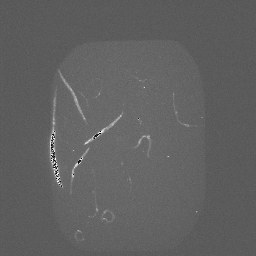

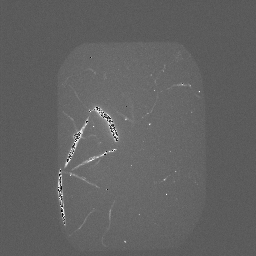

In [55]:
# Mostrar cada imagen
from IPython.display import display # Importa la función display para mostrar la imagen en una celda de Jupyter

# Mostrar cada imagen
for i in range(2):
    imagen = Image.fromarray(np.uint8(X[i]*255)) # Convierte el arreglo de numpy a una imagen
    display(imagen) # Muestra la imagen en una celda de Jupyter

Se emplean las imagenes binarizadas por cada celula

In [33]:
from PIL import Image
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

# Especifica la ruta a las imágenes 
data_path = ".\\train"

images = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith('.png')]
#images = [i for i in images if "w1" in i]
# Lee cada imagen y conviértela a un arreglo de numpy
X = []
x_lb=[]
for image in images:
    with Image.open(image) as img:
        img = img.resize((256, 256)) 
        img_arr = np.array(img)
        X.append(img_arr)
        x_lb.append(image)

# Convierte la lista de arreglos de numpy en un arreglo de numpy de 4 dimensiones
X = np.stack(X, axis=0)

# Normaliza los valores de los pixeles en el rango [0, 1]
X = X.astype('float32') / 255.0

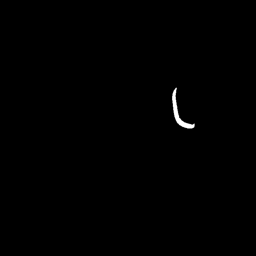

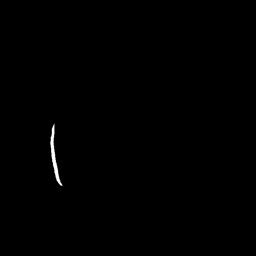

In [34]:
from IPython.display import display # Importa la función display para mostrar la imagen en una celda de Jupyter

# Mostrar cada imagen
for i in range(2):
    imagen = Image.fromarray(np.uint8(X[i]*255)) # Convierte el arreglo de numpy a una imagen
    display(imagen) # Muestra la imagen en una celda de Jupyter

In [35]:
# Etiquetas de entrenamiento 
y = []
for i in x_lb:
    if int(i[9:11])>12:
        y.append("No")
    else:
        y.append("Yes")
        
#print(x_lb)
#print(y)

# Inicializar el codificador de etiquetas
le = LabelEncoder()

# Convertir las etiquetas a números enteros
y_encoded = le.fit_transform(y)
# Guarda los datos y las etiquetas en archivos npy
np.save('train_data.npy', X)
np.save('train_labels.npy', y_encoded)

In [36]:
from PIL import Image
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder


data_path = ".\\test"

images = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith('.png')]
# Lee cada imagen y conviértela a un arreglo de numpy
X = []
x_lb=[]
for image in images:
    with Image.open(image) as img:
        img = img.resize((256, 256)) 
        img_arr = np.array(img)
        X.append(img_arr)
        x_lb.append(image)

# Convierte la lista de arreglos de numpy en un arreglo de numpy de 4 dimensiones
X = np.stack(X, axis=0)

# Normaliza los valores de los pixeles en el rango [0, 1]
X = X.astype('float32') / 255.0


# Etiquetas de entrenamiento 
y = []
for i in x_lb:
    if int(i[8:10])>12:
        y.append("No")
    else:
        y.append("Yes")
        
#print(x_lb)
#print(y)

# Inicializar el codificador de etiquetas
le = LabelEncoder()

# Convertir las etiquetas a números enteros
y_encoded = le.fit_transform(y)
# Guarda los datos y las etiquetas en archivos npy
np.save('test_data.npy', X)
np.save('test_labels.npy', y_encoded)

In [38]:
# Cargar los datos de entrenamiento y test
X_train = np.load('train_data.npy')
y_train = np.load('train_labels.npy')
X_test = np.load('test_data.npy')
y_test = np.load('test_labels.npy')


# Verifica la forma de los datos
print(X_train.shape)

(1125, 256, 256)


In [39]:
# Cargar los datos de entrenamiento y test
X_train = np.load('train_data.npy')
y_train = np.load('train_labels.npy')
X_test = np.load('test_data.npy')
y_test = np.load('test_labels.npy')



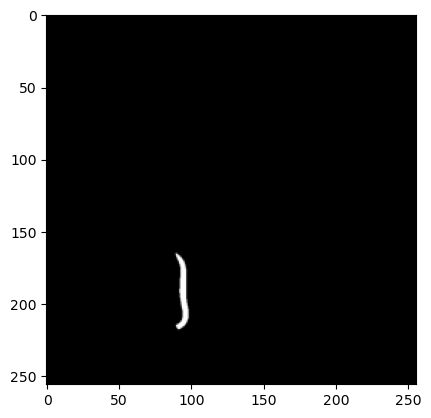

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Cargar los datos de entrenamiento y test
X_train = np.load('train_data.npy')
y_train = np.load('train_labels.npy')
X_test = np.load('test_data.npy')
y_test = np.load('test_labels.npy')

# Normalizar los valores de los pixeles en el rango [0, 1] de nuevo
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0



import matplotlib.pyplot as plt
plt.imshow(X_train[7].reshape(256, 256), cmap='gray')
plt.show()

In [205]:
print(X_test[2].shape)

(256, 256)


In [247]:
# Definir la arquitectura del modelo

model = keras.Sequential([
# Capa de convolución 2D con 512 filtros, tamaño del kernel de 3x3 y stride de 2x2
layers.Conv2D(512, (3, 3), strides=(2, 2), padding='same', use_bias=False, input_shape=(256, 256, 1)),
# Capa de normalización por lotes para normalizar las activaciones de la capa anterior
layers.BatchNormalization(),
# Capa de activación ReLU para introducir no linealidad en las activaciones
layers.ReLU(),
# Capa de convolución 2D con 16 filtros, tamaño del kernel de 3x3 y activación ReLU
layers.Conv2D(16, (3, 3), activation='relu'),
# Capa de reducción de tamaño mediante pooling de tamaño 2x2
layers.MaxPooling2D((2, 2)),
# Capa de aplanamiento para convertir las activaciones 2D en un vector unidimensional
layers.Flatten(),
# Capa densa con 32 neuronas y activación ReLU
layers.Dense(32, activation='relu'),
# Capa densa con 1 neurona y activación sigmoide para la clasificación binaria final
layers.Dense(1, activation='sigmoid')
])

In [249]:
opt = keras.optimizers.Adam(learning_rate=0.001) # se empleo menor learning rate para mejorar el desempeño
# Compilar el modelo
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo en los datos de entrenamiento
model.fit(X_train, y_train, epochs=5, batch_size=64)



# Evaluar el modelo en los datos de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
21/21 [==============================] - 226s 11s/step - loss: 0.3369 - accuracy: 0.8450
Epoch 2/5
21/21 [==============================] - 226s 11s/step - loss: 0.2290 - accuracy: 0.9076
Epoch 3/5
21/21 [==============================] - 225s 11s/step - loss: 0.1379 - accuracy: 0.9382
Epoch 4/5
21/21 [==============================] - 225s 11s/step - loss: 0.0815 - accuracy: 0.9702
Epoch 5/5
16/16 [==============================] - 14s 842ms/step - loss: 0.6045 - accuracy: 0.8878
Test accuracy: 0.8877755403518677


1/1 [==============================] - 0s 138ms/step
[[0.5190299 ]
 [0.48880637]
 [0.5369064 ]
 [0.5250588 ]
 [0.504825  ]]
[1 1 1 1 1]


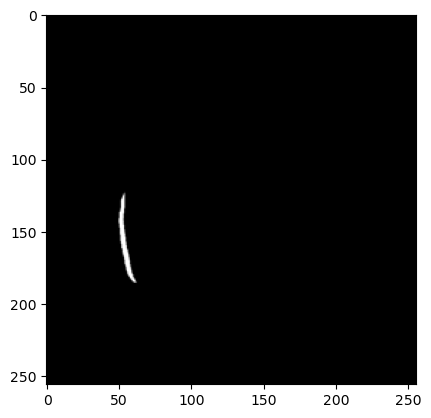

In [264]:
# Hacer la predicción
resultado = model.predict(X_test[0:5])

# Imprimir la predicción
print(resultado)
print(y_test[0:5])

import matplotlib.pyplot as plt
plt.imshow(X_test[1].reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
model.save('mi_modelo.h5')
tf.keras.models.save_model(model, filepath = ".",save_format='tf')

In [41]:
from tensorflow import keras

# Cargar el modelo guardado
model = keras.models.load_model('mi_modelo.h5')

In [42]:
import sklearn.metrics
# Obtener las predicciones del modelo en el conjunto de datos de prueba
y_pred = model.predict(X_test)

y_pred = np.round(y_pred)

# Calcular el F1-score
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print("F1-score: ", f1_score)

9/9 [==============================] - 7s 805ms/step
F1-score:  0.9542483660130718
